# Lektion 11

## Extrema unter Nebenbedingungen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
init_printing()

In [2]:
x = Symbol('x')
y = Symbol('y')
lam = Symbol('lambda')

In [3]:
g = x**4 + y**4 - 1

In [4]:
f = x**2 + y**2

Gesucht: Maximum von $f$ unter der Nebenbedingung $g=0$

In [5]:
grf = Matrix([f]).jacobian([x,y])
grf

In [6]:
grg = Matrix([g]).jacobian([x,y])
grg

In [7]:
gls = grf - lam*grg
gls

In [8]:
glsmenge = set(gls)

In [9]:
glsmenge.add(g)
glsmenge

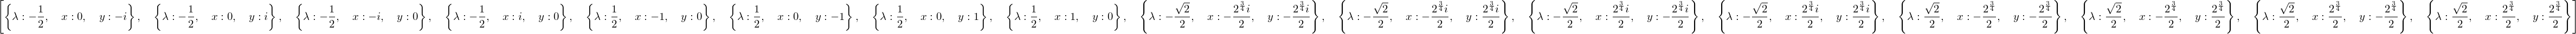

In [10]:
Lsg = solve(glsmenge)
Lsg

In [11]:
def test_real(l):
    x0 = x.subs(l)
    y0 = y.subs(l)
    return x0.is_real and y0.is_real

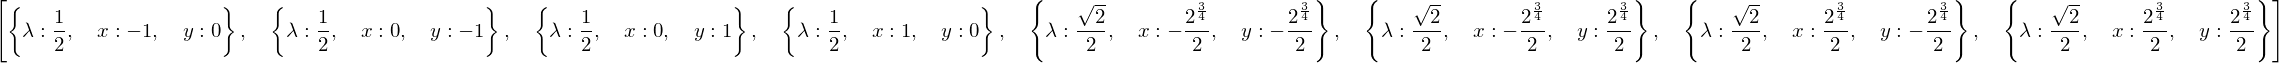

In [12]:
reelle_lsg = [l for l in Lsg if test_real(l)]
reelle_lsg

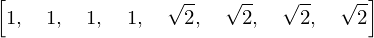

In [13]:
werte = [f.subs(l) for l in reelle_lsg]
werte

In [14]:
fn = lambdify((x,y), f, 'numpy')
gn = lambdify((x,y), g, 'numpy')

In [15]:
x = np.linspace(-1.5, 1.5)
y = np.linspace(-1.5, 1.5)
X, Y = np.meshgrid(x, y)
Wf = fn(X, Y)
Wg = gn(X, Y)

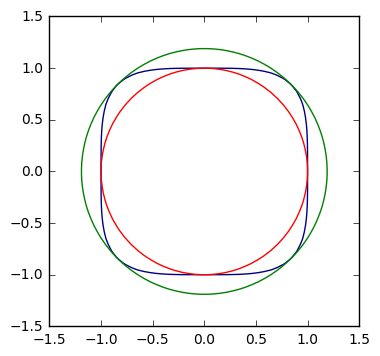

In [16]:
plt.contour(X, Y, Wg, levels=[0])
plt.contour(X, Y, Wf, levels=[1, np.sqrt(2)], colors=['red', 'green'])
plt.axis('image');

## Plotverschönerung 

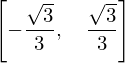

In [17]:
x = Symbol('x')
f = 1/(1+x**2)
wendestellen = solve(f.diff(x,2))
wendestellen

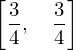

In [18]:
werte = [f.subs(x, w) for w in wendestellen]
werte

In [19]:
xn = np.linspace(-3.5, 3.5, 100)
fn = lambdify(x, f)
wn = fn(xn)

In [20]:
props = {}
props['arrowstyle'] = '-|>'

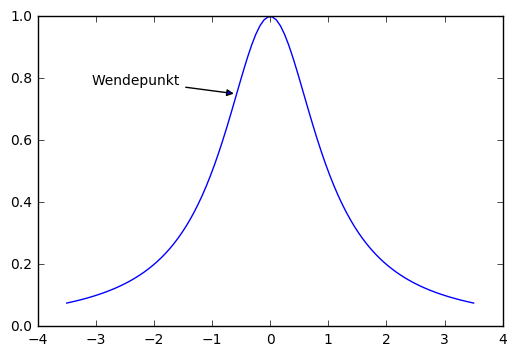

In [21]:
plt.plot(xn, wn)
wx = wendestellen[0].n()
wy = fn(wx)
plt.annotate("Wendepunkt", (wx, wy), (wx-2.5, wy+.03),
            arrowprops=props);

## Differentialgleichungen

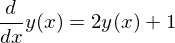

In [22]:
x = Symbol('x')
y = Function('y')
dgl = Eq(y(x).diff(x), 2*y(x)+1)
dgl

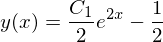

In [23]:
Lsg = dsolve(dgl)
Lsg

In [24]:
print(Lsg)

Eq(y(x), C1*exp(2*x)/2 - 1/2)


In [25]:
#Lsg.subs(C1, 3)   # NameError

In [36]:
C1 = Symbol('C1')

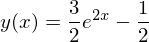

In [37]:
Lsg.subs(C1, 3)